In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# np.seterr(all='ignore')

In [2]:
initial_data = np.genfromtxt("kc_house_data.csv",delimiter=",") #if locally saved
# download from https://github.com/Alex-ley/Machine_learning_articles/blob/Part-2/kc_house_data.csv
# or use directly from https://raw.githubusercontent.com/Alex-ley/Machine_learning_articles/Part-2/kc_house_data.csv
iterations = 500
learning_rate = 0.000000001
initial_m = 0
initial_b = 0

In [3]:
initial_data = pd.read_csv("kc_house_data.csv")

In [4]:
initial_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
initial_X_act = initial_data['sqft_living']
initial_Y_act = initial_data['price']

In [6]:
X_act = initial_X_act.to_numpy(dtype=np.float64)
Y_act = initial_Y_act.to_numpy(dtype=np.float64)

Text(0, 0.5, 'Housing Price')

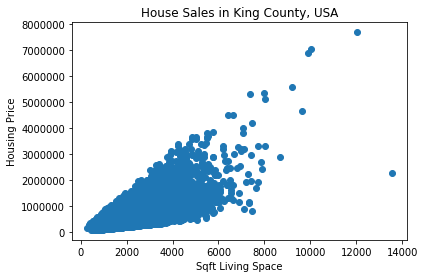

In [7]:
# X_act = inital_X_act.as_matrix()
# Y_act = inital_Y_act.as_matrix()
plt.scatter(x=X_act,y=Y_act)
plt.title('House Sales in King County, USA')
plt.xlabel('Sqft Living Space')
plt.ylabel('Housing Price')

In [8]:
X = X_act.reshape(-1,1) # reshape turns the array into a 1-D Matrix (x matrix)
ones_v = np.ones([X.shape[0], 1]) # create a array containing only ones (to multiply by b or theta-1)
ones_h = ones_v.reshape(1,-1) # create a array containing only ones (to multiply by b or theta-1)
X = np.concatenate([ones_v, X],1) # cocatenate the ones to X matrix
y = Y_act.reshape(-1,1) # create the y matrix, -1 tells numpy to figure out the dimension by itself
initial_theta = np.array([[0,0]])

In [9]:
ones_h, initial_theta

(array([[1., 1., 1., ..., 1., 1., 1.]]), array([[0, 0]]))

In [10]:
def computeCostAndDerivatives(X,y,theta,learning_rate):
    cost = ones_h @ ((X @ theta.T - y)*(X @ theta.T - y)) # @ makes np perform matrix multiplication        
    avg_cost = np.around(cost / float(len(X)),decimals=2)
    
    theta = theta - ((2*learning_rate)/len(X)) * ones_h@((X @ theta.T - y)*X) #brackets are very important for Matrix algebra here
    
    return avg_cost, theta

In [11]:
avg_cost, theta = computeCostAndDerivatives(X,y,initial_theta,learning_rate)

In [12]:
avg_cost, theta

(array([[4.26471343e+11]]), array([[1.08017628e-03, 2.72006732e+00]]))

In [13]:
def gradientDescent(X,y,theta,iterations,learning_rate):
    avg_cost_array = []
    for i in range(iterations):
        avg_cost, theta = computeCostAndDerivatives(X,y,theta,learning_rate)
        if i % (iterations / 10) ==0:
            print(avg_cost, theta)
        avg_cost_array.append(avg_cost)
    return avg_cost, theta, avg_cost_array

In [14]:
avg_cost, final_theta, avg_cost_array = gradientDescent(X,y,initial_theta,iterations,learning_rate)

[[4.26471343e+11]] [[1.08017628e-03 2.72006732e+00]]
[[1.95222271e+11]] [[4.28235903e-02 1.08238450e+02]]
[[1.13427128e+11]] [[6.73616903e-02 1.70993963e+02]]
[[8.44953568e+10]] [[8.16671818e-02 2.08316885e+02]]
[[7.42618958e+10]] [[8.98869794e-02 2.30514147e+02]]
[[7.06422169e+10]] [[9.44873995e-02 2.43715643e+02]]
[[6.93618997e+10]] [[9.69352479e-02 2.51567040e+02]]
[[6.89090386e+10]] [[9.81028859e-02 2.56236543e+02]]
[[6.8748857e+10]] [[9.85091374e-02 2.59013662e+02]]
[[6.86921991e+10]] [[9.84625654e-02 2.60665313e+02]]


In [15]:
print(f"after {iterations} iterations, the avg_cost={avg_cost} theta={final_theta}")

after 500 iterations, the avg_cost=[[6.8672389e+10]] theta=[[9.81548463e-02 2.61632549e+02]]


Text(0, 0.5, 'Housing Price')

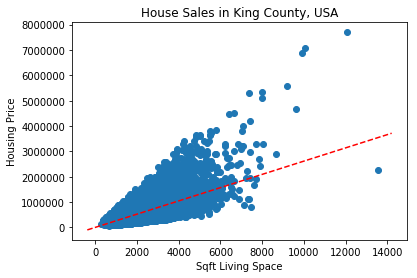

In [16]:
plt.scatter(X_act, Y_act)
axes = plt.gca() #get current axes
x_vals = np.array(axes.get_xlim())
x_vals_matrix = np.concatenate([np.ones([2,1]),x_vals.reshape(-1,1)],1)
# y_vals = final_theta[0][1]* x_vals + final_theta[0][0] #this is a simple case when x = mx + b
y_vals = ((x_vals_matrix @ final_theta.T).T).flatten() #this is a more general case using matrix algebra
plt.plot(x_vals, y_vals, 'r--')
plt.title('House Sales in King County, USA')
plt.xlabel('Sqft Living Space')
plt.ylabel('Housing Price')

Text(0, 0.5, 'Avg_cost')

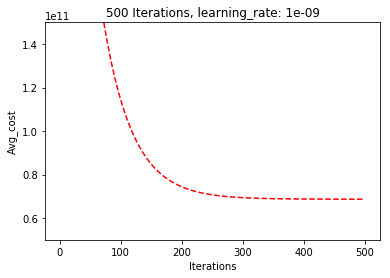

In [17]:
epochs = np.array(np.linspace(1,iterations,num=iterations)).reshape(-1,1)
y_axis_cost = np.array(avg_cost_array,dtype='object').reshape(-1,1) #dtype= np.longdouble np.float64 etc.
plt.title(f"500 Iterations, learning_rate: {learning_rate}")
plt.ylim((5e10,1.5e11))
plt.plot(epochs, y_axis_cost , 'r--')
plt.xlabel('Iterations')
plt.ylabel('Avg_cost')

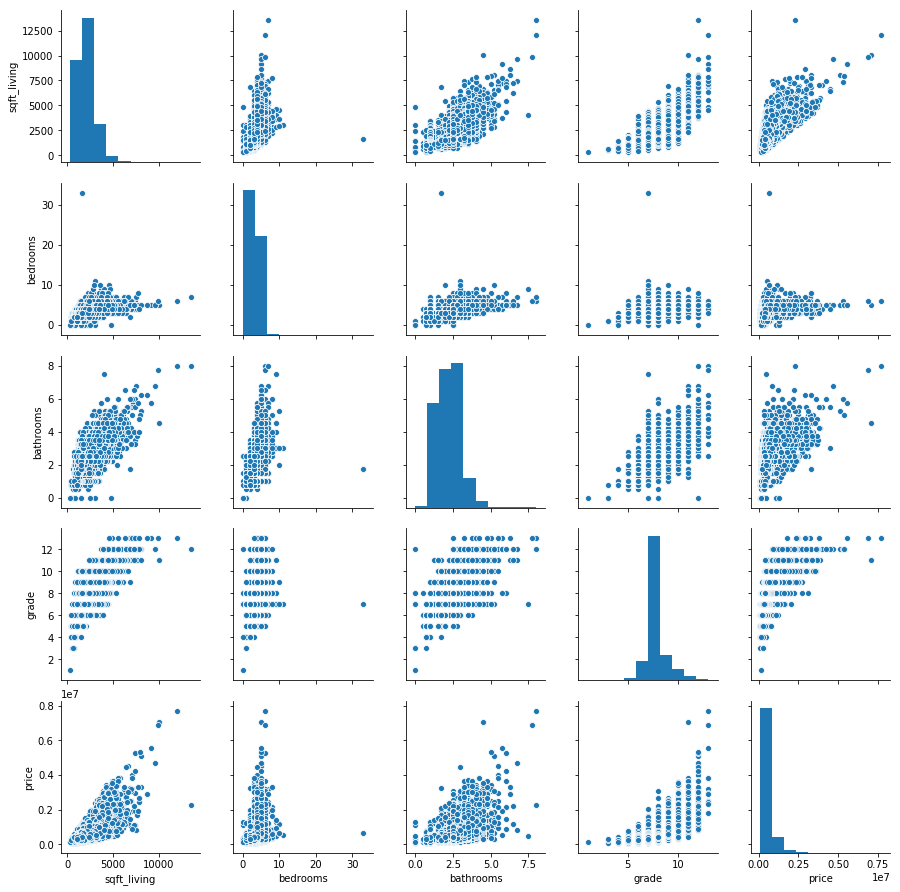

In [18]:
sns.pairplot(initial_data[['sqft_living','bedrooms','bathrooms','grade','price']])